In [1]:
import json
import pandas as pd

NAME_FILE = '../name_mapping.json'
f = open(NAME_FILE)
name_data = json.load(f)

In [2]:
NUMERIC_MEMORY_CSV = '../data/numeric_memory.csv'

data = pd.read_csv(NUMERIC_MEMORY_CSV)

In [3]:
renamed_nm = data.rename(columns=name_data)
renamed_nm

,subject_id,Maximum digits remembered correctly
0,1000085,9.0
1,1000158,7.0
2,1000251,8.0
3,1000279,8.0
4,1000295,7.0
...,...,...
111041,6024683,7.0
111042,6024769,4.0
111043,6024781,8.0
111044,6024822,8.0


In [4]:
# renamed_nm.to_csv('../processed_data/numeric_memory.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

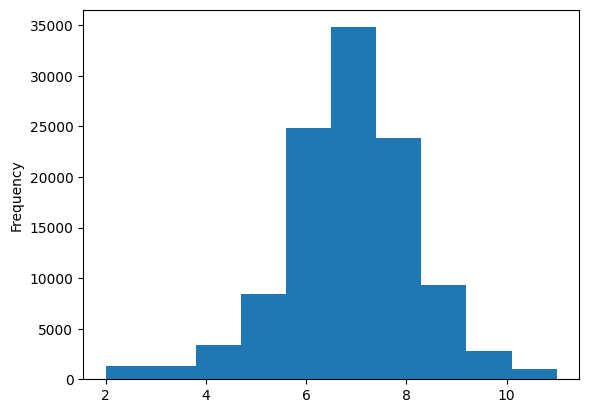

In [5]:
renamed_nm['Maximum digits remembered correctly'].plot.hist()

# Check relationship with age

In [10]:
age_df = pd.read_csv('../data/age.csv').rename(columns=name_data)
gender_df = pd.read_csv('../data/gender.csv').rename(columns=name_data)

new_fi = pd.merge(renamed_nm, age_df, on='subject_id', how='inner')

In [11]:
new_fi

,subject_id,Maximum digits remembered correctly,age
0,1000085,9.0,51.0
1,1000158,7.0,60.0
2,1000251,8.0,53.0
3,1000279,8.0,54.0
4,1000295,7.0,57.0
...,...,...,...
111041,6024683,7.0,42.0
111042,6024769,4.0,69.0
111043,6024781,8.0,42.0
111044,6024822,8.0,52.0


<AxesSubplot:xlabel='Maximum digits remembered correctly', ylabel='age'>

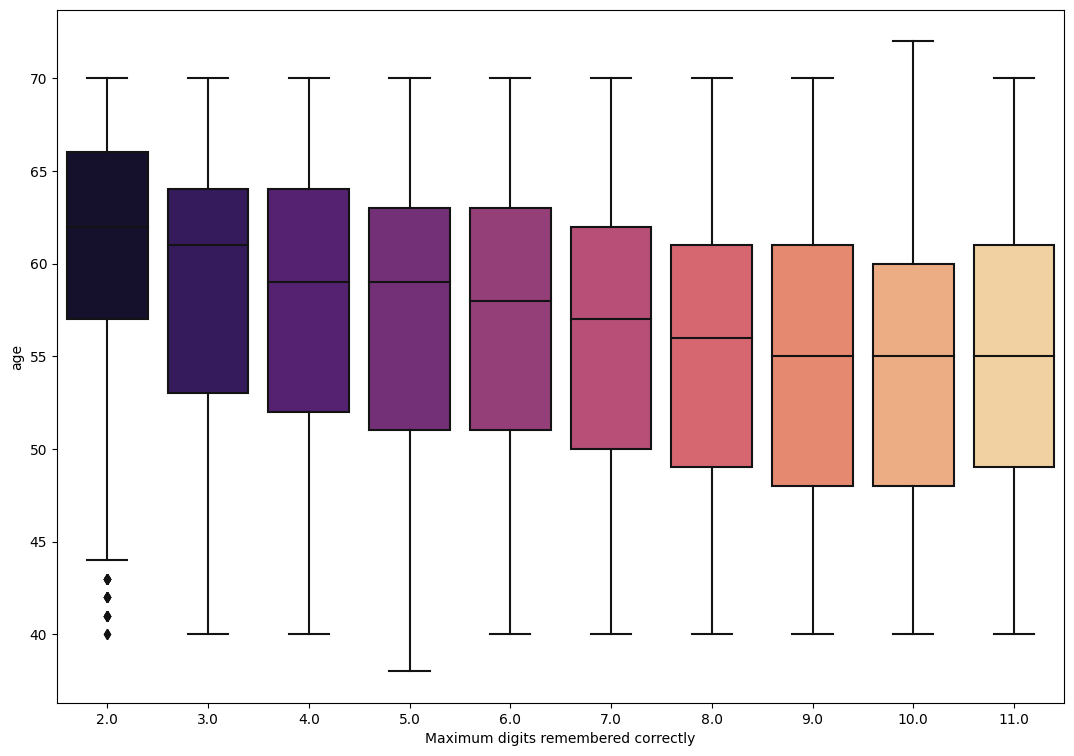

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,9))
sns.boxplot(x=new_fi['Maximum digits remembered correctly'], y=new_fi['age'], palette=("magma"))